Decision Tree Regression: Supervised Modelling

In [ ]:
## importing the decision tree using lines of codes
from sklearn.tree import DecisionTreeRegressor

## importing the test and train functions and features for the splitting data into training and testing for predictive modelling
from sklearn.model_selection import train_test_split

##fro evaluation of the model (decision tree)
from sklearn import metrics  ##accuracy, recall etc can be used now

## for model evaluatioin, importing all the indices required, confusion matrix,roc curve, etc.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
## here we are selecting all the columns which will act as predictor attributes
features = records.iloc[:, [10, 11, 12, 13, 14]]
X = records.iloc[:, [10, 11, 12, 13, 14]]

## assigning 'rate' as the label attribute (whose prediction to be done)
y = records['rate']


In [ ]:
## inspecting the features of our first model
X

,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking
0,0,0,700.0,13,4.750000
1,1,0,400.0,28,4.500000
2,1,0,200.0,18,4.000000
3,1,1,1200.0,550,4.800000
4,1,0,250.0,67,3.000000
...,...,...,...,...,...
40125,0,0,500.0,25,2.000000
40126,1,0,500.0,23,3.454545
40127,0,0,300.0,23,3.454545
40128,1,0,500.0,162,3.500000


In [ ]:
## inspecting label of our first predictive model  (rate)
y


0        3.6
1        3.8
2        3.9
3        4.3
4        3.7
        ... 
40125    2.9
40126    3.6
40127    3.1
40128    4.0
40129    3.1
Name: rate, Length: 31794, dtype: float64

In [ ]:
## to splitting the dataset given to us in two, training and testing with the ration of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#again inspecting
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])


       online_order  book_table  ave_cost_for_two  votes  ave_review_ranking
29899             0           0             400.0     82            3.714286
34196             1           0             350.0      8            4.428571
37535             1           0             250.0     50            4.000000
31454             1           0             250.0      7            1.000000
34025             1           0             150.0     36            4.000000
29899    3.9
34196    3.4
37535    3.8
31454    3.2
34025    3.4
Name: rate, dtype: float64
Training dataset size: 25435
Test dataset size: 6359


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
## creation of the decision tree model
regression = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

## training the model using the training dataset that we did split in the initial steps
regression = regression.fit(X_train, y_train)

## predicting using the values in the testing dataset
y_pred = regression.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

## model measurement: performance for the task
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## mse calculates difference btw actual and predicted values, Lower the MSE value better is the model performance
print("MSE calculates difference btw actual and predicted values, Lower the MSE value better is the model performance")
print("Mean Squared Error:", mse)
print("R square value depicts and assess the model's goodness of fit measure, Higher the value of R^2 better the model is")
print("R-squared:", r2)

MSE calculates difference btw actual and predicted values, Lower the MSE value better is the model performance
Mean Squared Error: 0.08048185462360355
R square value depicts and assess the model's goodness of fit measure, Higher the value of R^2 better the model is
R-squared: 0.5662978566166472


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt

Printing the Decision Tree

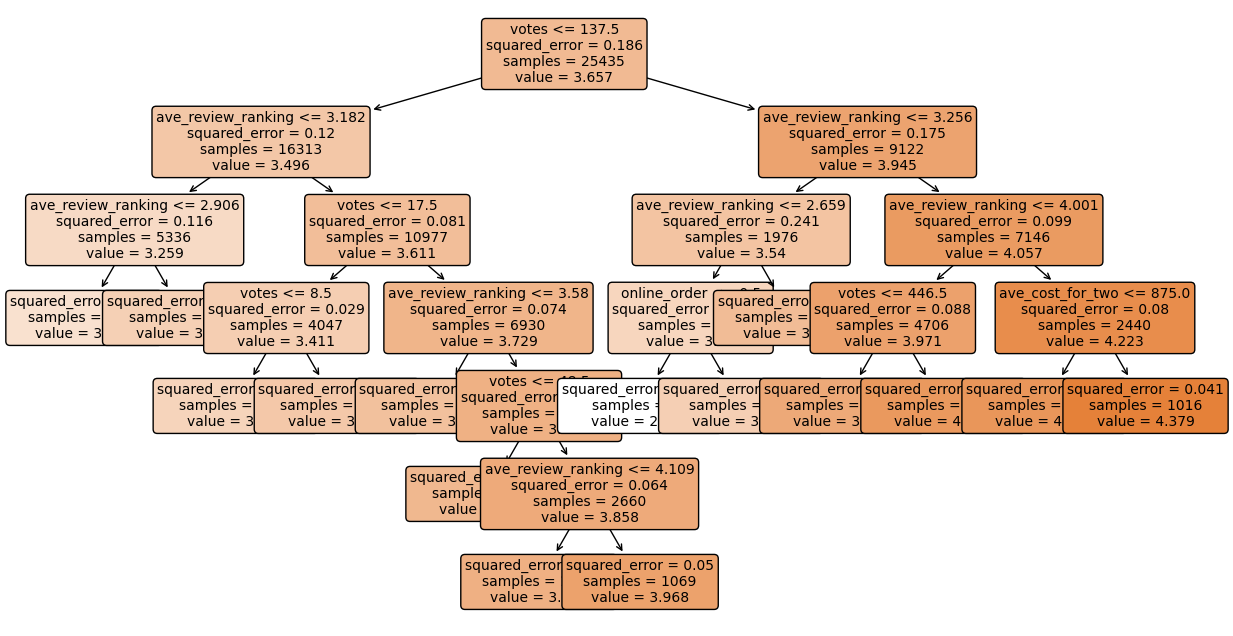

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(regression, feature_names=features.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [ ]:
## coparing values of actual and predicted values of the label column (rate)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

       Actual  Predicted
39278     2.3   3.872883
6660      3.6   3.784412
34342     4.1   3.635848
35875     3.7   3.175320
35701     3.5   3.784412
...       ...        ...
13944     3.8   3.784412
8598      3.9   3.784412
18283     3.5   3.335328
16244     3.3   3.335328
15473     4.4   4.082607

[6359 rows x 2 columns]
